# **Decision Tree:** Implementation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dtreeviz
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/arib168/data/refs/heads/main/Iris.csv").drop(columns=['Id'])

In [3]:
df.sample(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
144,6.7,3.3,5.7,2.5,Iris-virginica
125,7.2,3.2,6.0,1.8,Iris-virginica
77,6.7,3.0,5.0,1.7,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor


In [4]:
# Label Encoding on Species column

labelling = LabelEncoder()
df['Species'] = labelling.fit_transform(df['Species'])

In [5]:
df.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.782561,-0.419446,0.949043,0.956464,1.000000


In [6]:
# data splitting
X = df[['PetalLengthCm','PetalWidthCm']]
y = df[['Species']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [7]:
X

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


### Building a classifier model using Decision Tree

In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

### Exploring **Attributes** and **Functions** of model `Decision Tree`

[Text(0.4444444444444444, 0.9166666666666666, 'x[0] <= 2.45\ngini = 0.666\nsamples = 120\nvalue = [39, 42, 39]'),
 Text(0.3333333333333333, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.38888888888888884, 0.8333333333333333, 'True  '),
 Text(0.5555555555555556, 0.75, 'x[1] <= 1.75\ngini = 0.499\nsamples = 81\nvalue = [0, 42, 39]'),
 Text(0.5, 0.8333333333333333, '  False'),
 Text(0.3333333333333333, 0.5833333333333334, 'x[0] <= 5.3\ngini = 0.127\nsamples = 44\nvalue = [0, 41, 3]'),
 Text(0.2222222222222222, 0.4166666666666667, 'x[1] <= 1.65\ngini = 0.046\nsamples = 42\nvalue = [0, 41, 1]'),
 Text(0.1111111111111111, 0.25, 'gini = 0.0\nsamples = 40\nvalue = [0, 40, 0]'),
 Text(0.3333333333333333, 0.25, 'x[0] <= 4.75\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.2222222222222222, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.444444444444444

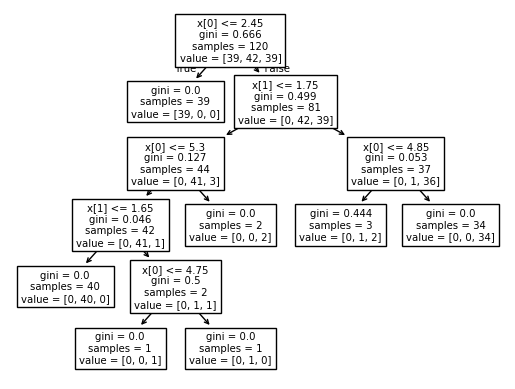

In [9]:
# plotting decision tree
plot_tree(model)

In [10]:
# depth of model
model.get_depth()

5

In [11]:
# numbers of leaves
model.get_n_leaves()

np.int64(7)

In [12]:
model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [13]:
y_pred = model.predict(X_test)

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

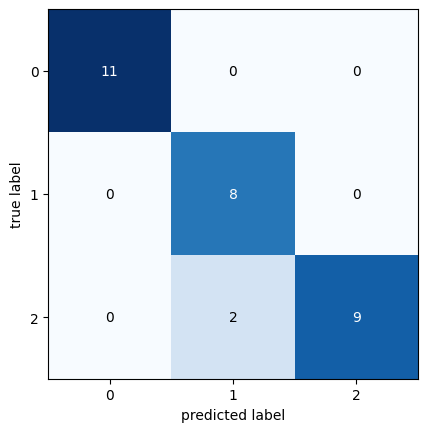

In [14]:
plot_confusion_matrix(confusion_matrix(y_test,y_pred))

In [15]:
r2_score(y_test, y_pred)

0.9090909090909091

In [16]:
accuracy_score(y_test, y_pred)

0.9333333333333333

/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


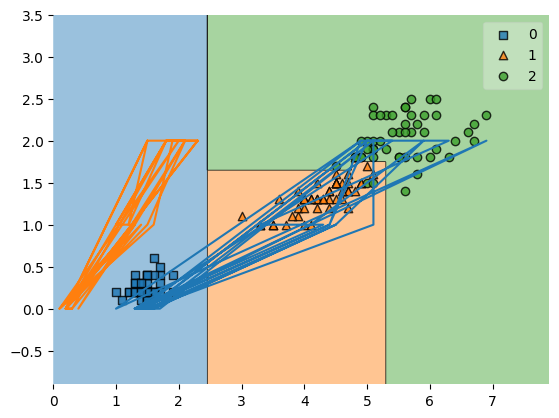

In [17]:
plot_decision_regions(X.values, y.values.ravel(), model)
plt.plot(X_test,y_test)

### Visualize Decision tree using `dtreeviz` library

In [18]:
viz = dtreeviz.model(model, X,y.values.ravel())

In [19]:
viz.view()

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH